<a href="https://colab.research.google.com/github/Octaxx/DLI-Assignment/blob/main/Model_1_Gavin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# === Step 1: Load DatasetCleaning.ipynb from GitHub ===
import requests, nbformat
from IPython import get_ipython


url = "https://raw.githubusercontent.com/Octaxx/DLI-Assignment/refs/heads/main/DatasetCleaning.ipynb"
response = requests.get(url)
notebook = nbformat.reads(response.text, as_version=4)
ipython = get_ipython()

print("⚙️ Running cells from DatasetCleaning.ipynb...\n")
for i, cell in enumerate(notebook.cells):
    if cell.cell_type == 'code':
        try:
            print(f"▶️ Executing cell {i+1}...")
            ipython.run_cell(cell.source)
        except Exception as e:
            print(f"❌ Error in cell {i+1}: {e}")
print("\n✅ All notebook cells executed.")


⚙️ Running cells from DatasetCleaning.ipynb...

▶️ Executing cell 2...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
▶️ Executing cell 3...
📊 BEFORE BALANCING
--------------------------------------------------
Total rows before balancing: 18634
Class balance before balancing:
Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


,Email Text,Email Type,Label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0
1,the other side of * galicismos * * galicismo *...,Safe Email,0
2,re : equistar deal tickets are you still avail...,Safe Email,0
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1
4,software at incredibly low prices ( 86 % lower...,Phishing Email,1
5,global risk management operations sally congra...,Safe Email,0
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,0
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,1
8,"we owe you lots of money dear applicant , afte...",Phishing Email,1
9,re : coastal deal - with exxon participation u...,Safe Email,0


▶️ Executing cell 4...

📊 AFTER BALANCING (Oversampling)
--------------------------------------------------
Total rows after balancing: 22644
Class balance after balancing:
Email Type
Phishing Email    11322
Safe Email        11322
Name: count, dtype: int64
▶️ Executing cell 5...

🧾 SAMPLE OF CLEANED & BALANCED DATAFRAME
Total Rows        : 22644
Phishing Emails   : 11322
Safe Emails       : 11322

🧪 Cleaned & Balanced DataFrame (First 5 Rows):


,Email Text,Email Type,Label
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,Phishing Email,1
1,semantics : il dominio tempo-aspettuale il dom...,Safe Email,0
2,mature mom and her young horny lover ! . . woo...,Phishing Email,1
3,do you own a car ; starting december 7 th ford...,Phishing Email,1
4,rescue you from highprice medicaments and badp...,Phishing Email,1



🎯 Phishing Emails (First 5):


,Email Text,Email Type,Label
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,Phishing Email,1
2,mature mom and her young horny lover ! . . woo...,Phishing Email,1
3,do you own a car ; starting december 7 th ford...,Phishing Email,1
4,rescue you from highprice medicaments and badp...,Phishing Email,1
11,New Web Technology\nUNLIMITED WEB CONFERENCING...,Phishing Email,1



✅ Safe Emails (First 5):


,Email Text,Email Type,Label
1,semantics : il dominio tempo-aspettuale il dom...,Safe Email,0
5,http://www.bbc.co.uk/radio1/alt/nireland/ni_te...,Safe Email,0
6,Hi Damian.SuSe has a Sparc version I previousl...,Safe Email,0
7,"hpl nom for may 25 , 2001 ( see attached file ...",Safe Email,0
8,iatl 14 : final cfp the 14th annual meeting - ...,Safe Email,0


▶️ Executing cell 6...

🧠 Sample Extracted Features (First 5):


,Email Preview,char_count,word_count,exclamation_count,uppercase_ratio,has_link,has_login_word,has_html
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,3893,586,2,0.034,0,1,0
1,semantics : il dominio tempo-aspettuale il dom...,904,154,0,0.000,0,0,0
2,mature mom and her young horny lover ! . . woo...,664,141,1,0.000,0,0,0
3,do you own a car ; starting december 7 th ford...,792,170,0,0.000,0,0,0
4,rescue you from highprice medicaments and badp...,796,163,0,0.000,0,0,0



✅ Final Columns:
['Email Text', 'Email Type', 'Label', 'Email Preview', 'char_count', 'word_count', 'exclamation_count', 'uppercase_ratio', 'has_link', 'has_login_word', 'has_html']

✅ All notebook cells executed.


In [ ]:
# === Step 2: Set Number of Epochs and Training Runs ===
try:
    n_epochs = int(input("Enter number of LSTM epochs: "))
except:
    n_epochs = 5
    print("⚠️ Invalid input. Defaulting LSTM epochs to 5.")

try:
    num_runs = int(input("Enter number of ensemble training runs: "))
except:
    num_runs = 3
    print("⚠️ Invalid input. Defaulting ensemble runs to 3.")

Enter number of LSTM epochs: 2
Enter number of ensemble training runs: 10


In [ ]:
# === Step 3: Feature Engineering for Classical Models ===
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
from scipy.sparse import hstack, csr_matrix
import pandas as pd

df_G = df_balanced.copy()


# Feature extraction from text
df_G['url_count'] = df_G['Email Text'].str.count(r'http[s]?://')
df_G['num_dots'] = df_G['Email Text'].str.count(r'\.')
df_G['has_attachment_word'] = df_G['Email Text'].str.contains(r'attachment|invoice|pdf', case=False).astype(int)
df_G['has_suspicious_word'] = df_G['Email Text'].str.contains(r'verify|account|confirm|login', case=False).astype(int)
df_G['avg_word_length'] = df_G['char_count'] / (df_G['word_count'] + 1)
df_G['special_char_count'] = df_G['Email Text'].str.count(r'[#$%^&*()]')
df_G['has_spam_phrase'] = df_G['Email Text'].str.contains(
    r'congratulations|you have won|limited time|click below', case=False
).astype(int)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf_G = tfidf.fit_transform(df_G['Email Text'])

stat_features = df_G[[
    'char_count', 'word_count', 'exclamation_count', 'uppercase_ratio',
    'has_link', 'has_login_word', 'has_html', 'url_count', 'num_dots',
    'has_attachment_word', 'has_suspicious_word', 'avg_word_length',
    'special_char_count', 'has_spam_phrase'
]]
stat_scaled = MinMaxScaler().fit_transform(stat_features)

def extract_cues(text):
    text = text.lower()
    return pd.Series({
        'has_urgent': int(any(w in text for w in ['urgent', 'immediate', 'now'])),
        'has_threat': int(any(w in text for w in ['suspend', 'locked', 'compromised'])),
        'has_generic': int(any(w in text for w in ['dear user', 'dear customer', 'valued customer']))
    })

cue_features = df_G['Email Text'].apply(extract_cues)
cue_scaled = MinMaxScaler().fit_transform(cue_features)

X_combined = hstack([X_tfidf_G, csr_matrix(stat_scaled), csr_matrix(cue_scaled)])
y = df_G['Label']

In [ ]:
# === Step 4: LSTM Training ===
print("\n\U0001f9e0 Starting LSTM Training...")

max_words = 5000
max_len = 100
embedding_dim = 64

tokenizer_G = Tokenizer(num_words=max_words)
tokenizer_G.fit_on_texts(df_G['Email Text'])
sequences_G = tokenizer_G.texts_to_sequences(df_G['Email Text'])
X_seq_G = pad_sequences(sequences_G, maxlen=max_len)
y_seq_G = df_G['Label'].values

X_train_seq_G, X_test_seq_G, y_train_seq_G, y_test_seq_G = train_test_split(X_seq_G, y_seq_G, test_size=0.2, stratify=y_seq_G)

input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_layer)
lstm_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model_LSTM = Model(inputs=input_layer, outputs=output_layer)
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_G = model_LSTM.fit(X_train_seq_G, y_train_seq_G, epochs=n_epochs, batch_size=16,
                    validation_data=(X_test_seq_G, y_test_seq_G), verbose=1)

loss, acc_G = model_LSTM.evaluate(X_test_seq_G, y_test_seq_G, verbose=0)
print(f"\n✅ LSTM Accuracy after {n_epochs} epochs: {acc_G:.4f}")

# === Step 5: Hybrid Model Training (LSTM as Feature Extractor + Decision Tree + Random Forest) ===
print("\n🤖 Running Hybrid LSTM + Tree Models Training...\n")
all_conf_matrices = []

feature_extractor = Model(inputs=model_LSTM.input, outputs=lstm_layer)
X_lstm_features = feature_extractor.predict(X_seq_G)
y_lstm_labels = y_seq_G

results_G = []

for run in range(num_runs):
    print(f"\n📦 Hybrid Training Run {run + 1}/{num_runs}")
    start = time.time()

    X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(
        X_lstm_features, y_lstm_labels, test_size=0.2, random_state=run, stratify=y_lstm_labels
    )

    clf_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

    ensemble_G = VotingClassifier(estimators=[
        ('dt', clf_dt),
        ('rf', clf_rf)
    ], voting='soft')

    ensemble_G.fit(X_train_G, y_train_G)
    y_pred_G = ensemble_G.predict(X_test_G)
    y_proba_G = ensemble_G.predict_proba(X_test_G)[:, 1]

    acc_G = accuracy_score(y_test_G, y_pred_G)
    prec_G = precision_score(y_test_G, y_pred_G)
    rec_G = recall_score(y_test_G, y_pred_G)
    f1_G = f1_score(y_test_G, y_pred_G)
    roc_G = roc_auc_score(y_test_G, y_proba_G)
    elapsed = time.time() - start

    print(f"✅ Accuracy: {acc_G:.4f}, Precision: {prec_G:.4f}, Recall: {rec_G:.4f}, F1: {f1_G:.4f}, ROC AUC: {roc_G:.4f}, Time: {elapsed:.2f}s")

    results_G.append({
        'Run': run + 1, 'Accuracy': acc_G, 'Precision': prec_G,
        'Recall': rec_G, 'F1': f1_G, 'ROC_AUC': roc_G, 'Time': elapsed
    })

    cm = confusion_matrix(y_test_G, y_pred_G)
    all_conf_matrices.append(cm)

summary_df = pd.DataFrame(results_G)
from IPython.display import display

display(summary_df)

print("\n📊 Averages:")
print(summary_df.mean(numeric_only=True).round(4))


🧠 Starting LSTM Training...
Epoch 1/2
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 156s 133ms/step - accuracy: 0.8682 - loss: 0.3035 - val_accuracy: 0.9642 - val_loss: 0.0982
Epoch 2/2
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 199s 130ms/step - accuracy: 0.9682 - loss: 0.0900 - val_accuracy: 0.9702 - val_loss: 0.0934

✅ LSTM Accuracy after 2 epochs: 0.9702

🤖 Running Hybrid LSTM + Tree Models Training...

708/708 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step

📦 Hybrid Training Run 1/10
✅ Accuracy: 0.9826, Precision: 0.9731, Recall: 0.9925, F1: 0.9827, ROC AUC: 0.9979, Time: 17.31s

📦 Hybrid Training Run 2/10
✅ Accuracy: 0.9817, Precision: 0.9715, Recall: 0.9925, F1: 0.9819, ROC AUC: 0.9978, Time: 14.94s

📦 Hybrid Training Run 3/10
✅ Accuracy: 0.9808, Precision: 0.9702, Recall: 0.9920, F1: 0.9810, ROC AUC: 0.9975, Time: 16.03s

📦 Hybrid Training Run 4/10
✅ Accuracy: 0.9815, Precision: 0.9694, Recall: 0.9943, F1: 0.9817, ROC AUC: 0.9973, Time: 15.89s

📦 Hybrid Training Run 5/10
✅ Accuracy: 0.9803, Precision: 0.9690, Recal

,Run,Accuracy,Precision,Recall,F1,ROC_AUC,Time
0,1,0.982557,0.973149,0.992491,0.982725,0.997877,17.310268
1,2,0.981674,0.971478,0.992494,0.981874,0.997764,14.938836
2,3,0.980790,0.970194,0.992049,0.981000,0.997520,16.027321
3,4,0.981453,0.969423,0.994258,0.981683,0.997279,15.885588
4,5,0.980349,0.968952,0.992491,0.980580,0.998455,15.995957
5,6,0.977258,0.969184,0.985872,0.977457,0.997381,16.125762
6,7,0.979024,0.967658,0.991166,0.979271,0.996704,15.842963
7,8,0.980570,0.968979,0.992936,0.980811,0.997650,16.371701
8,9,0.980790,0.968589,0.993819,0.981042,0.997736,16.159124
9,10,0.983219,0.974415,0.992491,0.983370,0.998303,16.383717



📊 Averages:
Run           5.5000
Accuracy      0.9808
Precision     0.9702
Recall        0.9920
F1            0.9810
ROC_AUC       0.9977
Time         16.1041
dtype: float64


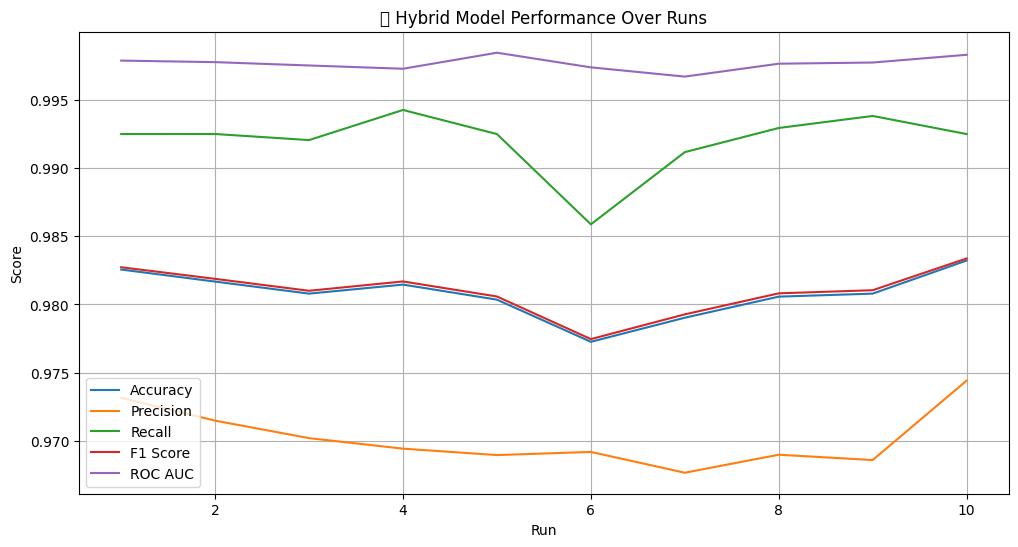

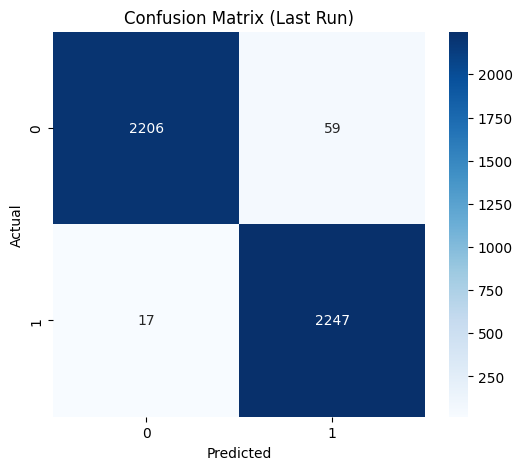

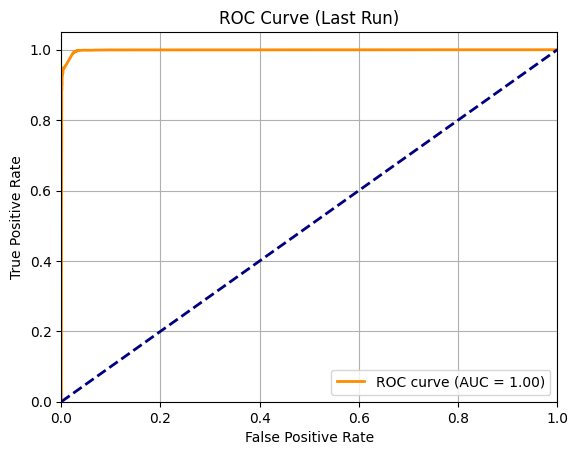

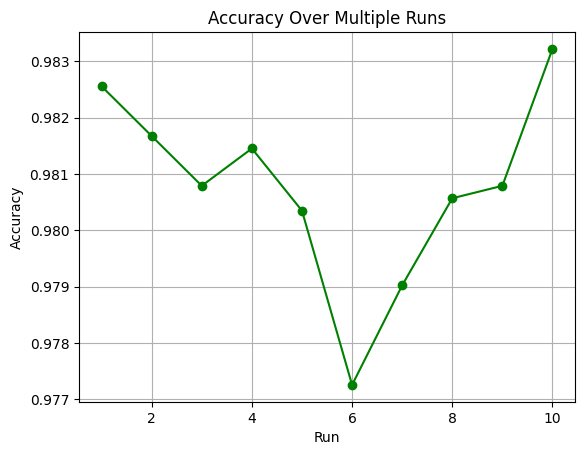

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# === Step 6: Visualization ===
plt.figure(figsize=(12, 6))
plt.plot(summary_df['Run'], summary_df['Accuracy'], label='Accuracy')
plt.plot(summary_df['Run'], summary_df['Precision'], label='Precision')
plt.plot(summary_df['Run'], summary_df['Recall'], label='Recall')
plt.plot(summary_df['Run'], summary_df['F1'], label='F1 Score')
plt.plot(summary_df['Run'], summary_df['ROC_AUC'], label='ROC AUC')
plt.title('📈 Hybrid Model Performance Over Runs')
plt.xlabel('Run')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix (Last Run)
plt.figure(figsize=(6, 5))
sns.heatmap(all_conf_matrices[-1], annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Last Run)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (Last Run)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Last Run)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Accuracy Over Multiple Runs
plt.figure()
plt.plot(summary_df['Run'], summary_df['Accuracy'], marker='o', linestyle='-', color='green')
plt.title('Accuracy Over Multiple Runs')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
